<a href="https://colab.research.google.com/github/Shiva120293/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Here in this project we will use various python modules to explore and analyze the Hotel Booking Data to discover important factors that govern the bookings.  we will discuss exploratory data analysis and data visualization of the hotel booking data set 

Firstly we will import the important libraries

In [104]:
# Importing the libraries needed in the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import plotly 
import plotly.express as px

**Reading and viewing** the dataset of hotel booking with the help of pandas read_csv method.

In [4]:
# Mounting the drive first

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading and viewing the csv file.

df = pd.read_csv('/content/drive/My Drive/Projects/Hotel_Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
# Viewing the names of columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Now we will Check number of **data types** here.

In [10]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

We see that there are :

```
```


**4 float64 columns** 

**16 int64 columns**

**12 object columns**  


First of all, we are going to make a **copy** of **original dataset** so to avoid any kind of data losses

In [15]:
# Creating a copy of dataframe

df1 = df.copy()
df1.shape

(119390, 32)

### <b> Cleaning data </b> 

Cleaning data is crucial step before Data anlysis as it will remove the ambigous data that can affect our outcome.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Dropping unimportant columns

### <b> Step 1: Removing duplicate rows if any </b>

In [16]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)
df1.shape

(87396, 32)

### <b> Step2: Handling missing values. </b>

In [27]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
# missing value against each columns.

total_missing_data = df.isnull().sum().sort_values(ascending=False)
total_missing_df = pd.DataFrame(total_missing_data)

# percentage of missing values

percentage_missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing_df, percentage_missing], axis=1, keys=['total_missing', 'percentage_missing'])

#missing_data

missing_data_without_nan = missing_data[missing_data > 0].dropna()
missing_data_without_nan

Since, **company** and **agent** columns have company number and agent numbers as data. There may be some cases when customer didn't booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace **null values** by **0** in these columns.

In [19]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [24]:
# Replacing the null values of “children” column by 0.

df1["children"].replace(np.nan, 0, inplace=True)
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [22]:
# Replacing the null values of “country” column by others.
df1['country'].fillna('others', inplace = True)

In [25]:
# Now let's Check if all null values are removed
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

**Data Analysis**
\
Lets first find the **correlation** between the numerical data.
\
\
Since, columns like '**is_cancelled**', '**arrival_date_year**', '**arrival_date_week_number**', '**arrival_date_day_of_month**', '**is_repeated_guest**', '**company**', '**agent**' are categorical data having numerical type. So we don't need to check them for correlation.


In [32]:
df2 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','adults','children', 'babies','stays_in_week_nights','stays_in_weekend_nights' ]]


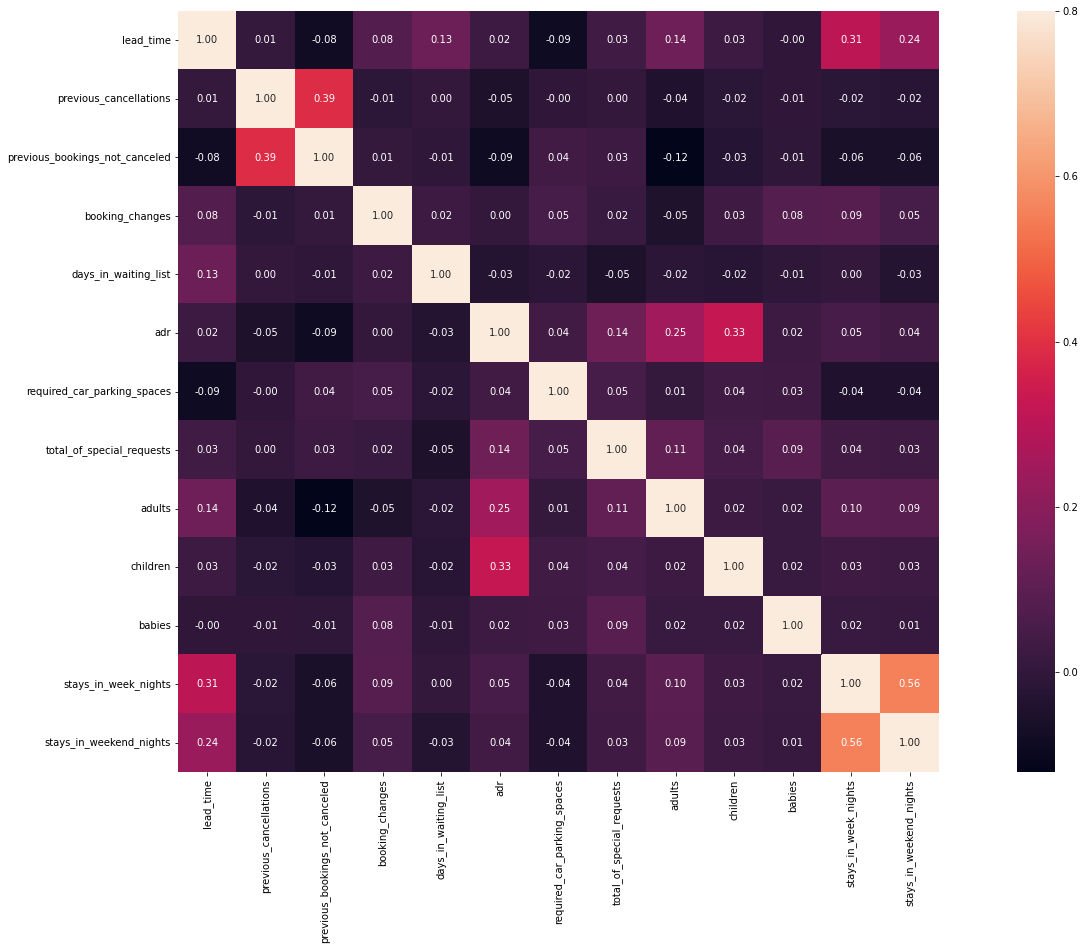

In [36]:
corrmat = df2.corr()

f, ax = plt.subplots(figsize=(28, 14))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

**Total stay length** and **lead time** have slight **correlation**. This may means that for **longer hotel stays** people generally plan **little before** the the actual arrival.

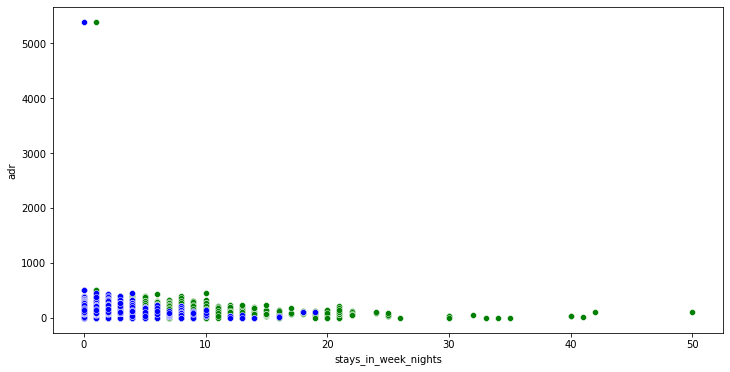

In [38]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'stays_in_week_nights',color='green',data = df1)
sns.scatterplot(y = 'adr', x = 'stays_in_weekend_nights',color='blue',data = df1)
plt.show()

Here we can notice that there is an **outlier** in adr, so we will remove that for having a better **scatter plot**

In [39]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

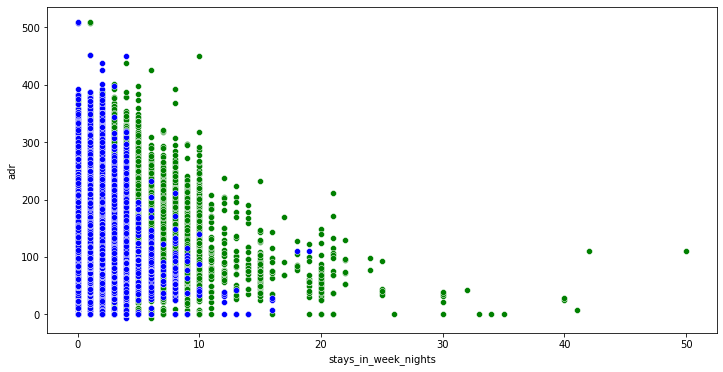

In [40]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'stays_in_week_nights',color='green',data = df1)
sns.scatterplot(y = 'adr', x = 'stays_in_weekend_nights',color='blue',data = df1)
plt.show()

**Conclusion of this scatter plot:**
\
From the scatter plot we can see that as length of **week nights and weekend nights** increases the adr decreases. This means for **longer stay**, the **better deal** for customer can be finalised.

**Data Analysis**  



Now, we will try to **analyze** this dataset from various aspects of the given attributes :
\
1. Agents with booking numbers  \
2. Room type in demand  \
3. Preffered meal type  \
4. Hotel wise  \
5. Hotel cancellation   \
6. Hotel Revisits scenarios   \
7. Distribution channel wise  \
8. Time wise Analysis  \
9. Country wise Analysis  \
10. Duration of stay


**1. Agents with booking numbers**

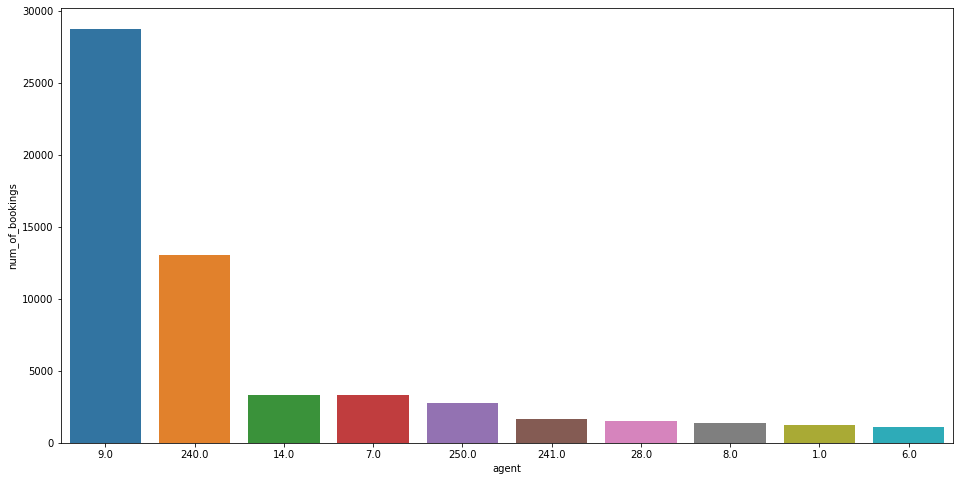

In [44]:
# Let's start with agent making most no. of bookings

df3 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns =  
                                                                    {'index':'agent','agent':'num_of_bookings'}
                                                                     ).sort_values(by = 'num_of_bookings', ascending = False)

df3.drop(df3[df3['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
df3 = df3[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (16,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = df3, order = df3.sort_values('num_of_bookings', ascending = False).agent)

Here we can clearly see that **Agent no. 9** has made most no. of bookings.

**2. Room type in demand**

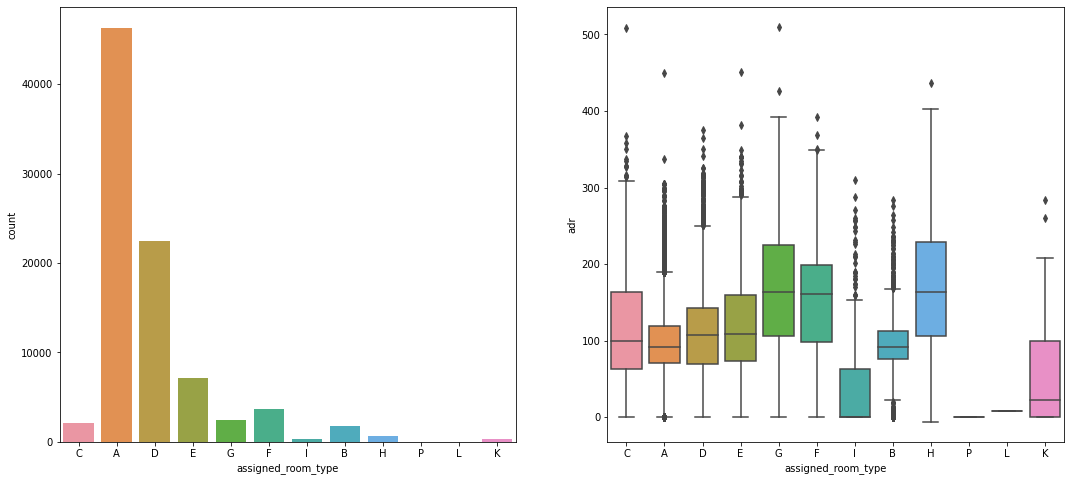

In [45]:
# Here will plot a bar plot and box plot to see type of rooms booked mostly

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
df3['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

From these plots we can see **Most demanded** room type is **A**, but from the **box plot** it is clear that **better adr rooms** are of **type H, G and C** also. Hotels should increase the no. of room types G and H to maximise revenue.

**3. Preffered meal type**

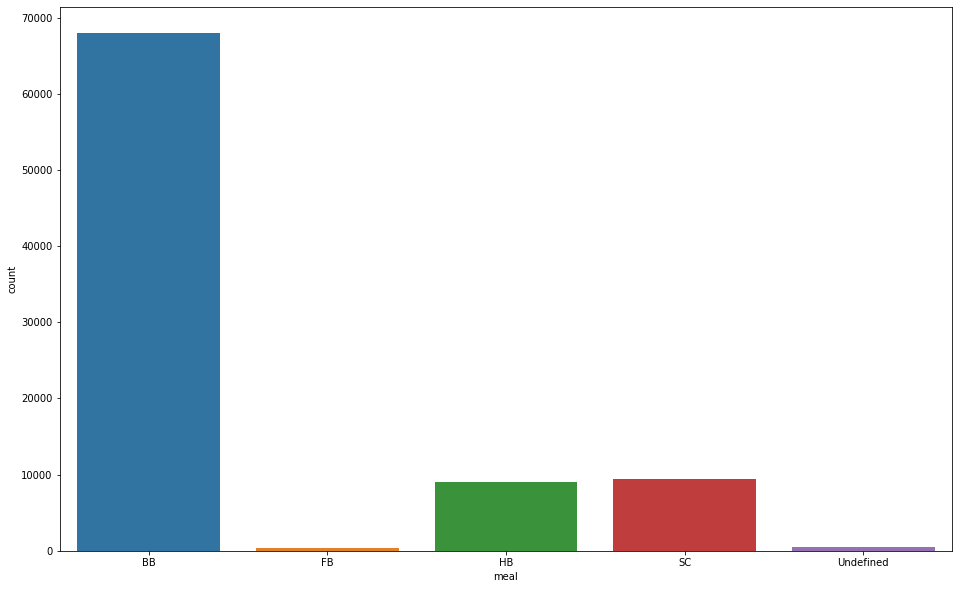

In [47]:
# Plotting to bar plot to have a view on meal seved to customers

plt.figure( figsize=(16, 10))

sns.countplot(x = df1['meal'])
plt.show()

From this plot we can say that most **preferred meal** type is **BB (Bed and breakfast).**

**4. Hotel Wise Analysis**

In [48]:
# Let's find the type of hotels people are preffering more

df1['hotel'].value_counts()

City Hotel      53427
Resort Hotel    33968
Name: hotel, dtype: int64

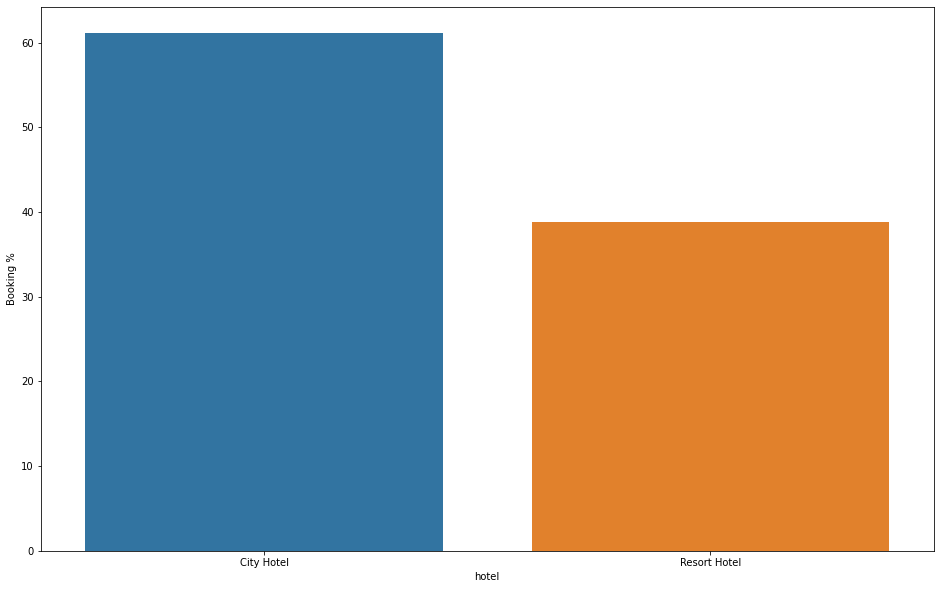

In [50]:
# We can also find the percentage of more bookings by hotel types

grouped_by_hotel = df1.groupby('hotel')
df4 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})

plt.figure(figsize = (16,10))
sns.barplot(x = df4['hotel'], y = df4['Booking %'] )
plt.show()

We can see people are booking **city hotels** more than **Resort hotels**. Around **60% bookings** are for City hotel and **40% bookings** are for Resort hotel.
Now we want to know in which **month** people book the hotel.

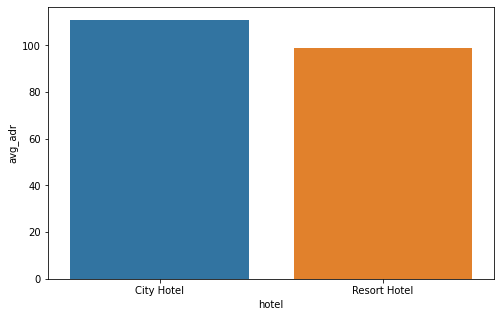

In [51]:
# Checking which type of hotel is giving more revenues

df5 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = df5['hotel'], y = df5['avg_adr'])
plt.show()

Average adr of **Resort hotel** is slightly lower than that of **City hotel**. Hence, **City hotel** seems to be making slightly **more revenue**.

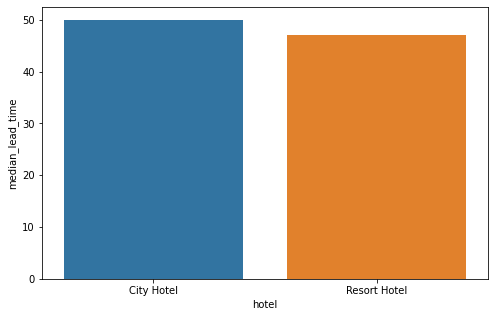

In [53]:
# Checking for lead time of hotels

df6 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = df6['hotel'], y = df6['median_lead_time'] )
plt.show()

**City hotel** has slightly higher **median** lead time. Also median lead time is significantly higher in each case, this means **customers** generally plan their hotel visits much earlier.

In [54]:
# Checking for the months having higher hotel bookings

df1['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7512
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

We can clearly see here that most number of people have booked the hotel in the month of **August**. 
Now we will visualize the **months with hotel types** with the help of **seaborn library** here.

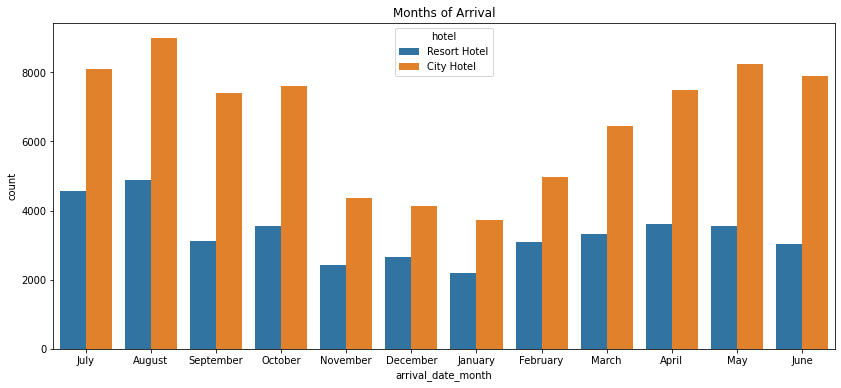

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df1)
plt.title('Months of Arrival')
plt.show()


Now we will find the **year** in which people booked the **hotel** most.

In [32]:
df1['arrival_date_year'].value_counts()


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

From here We can clearly say that in **2016** there was **highest bookings**.

We can also visualize this, **number of bookings by year**

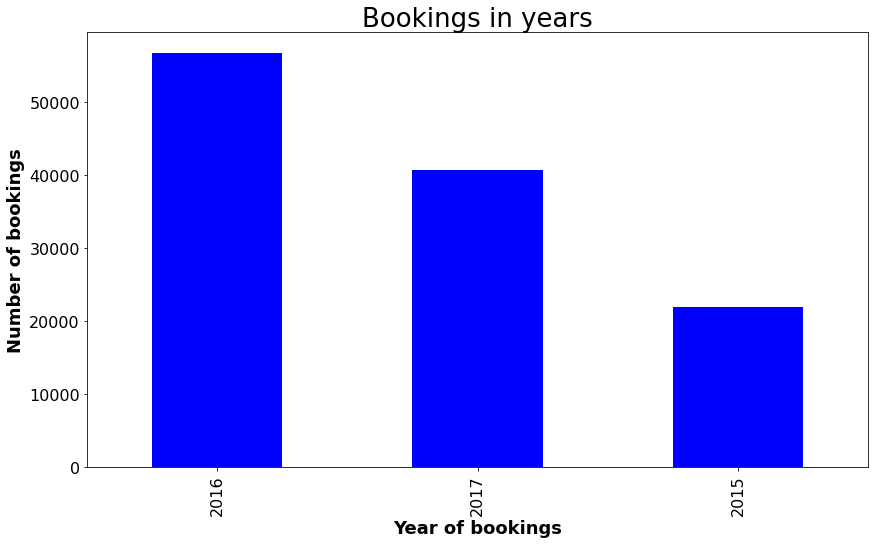

In [45]:
plt.figure(figsize=(14,8))
df.arrival_date_year.value_counts().plot(kind="bar",color='b', fontsize=16)
plt.title('Bookings in years', fontsize=26)
plt.xlabel('Year of bookings', fontsize=18, fontweight='bold')
plt.ylabel('Number of bookings', fontsize=18, fontweight='bold')

plt.show()

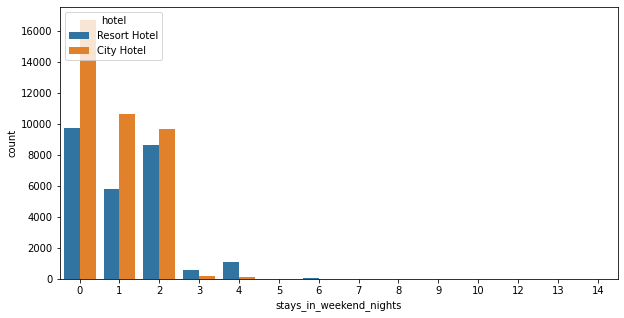

In [62]:
# Now we will check for the stay lengths in hotels

not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['stays_in_weekend_nights'] < 15]

plt.figure(figsize = (10,5))
sns.countplot(x = s1['stays_in_weekend_nights'], hue = s1['hotel'])
plt.show()

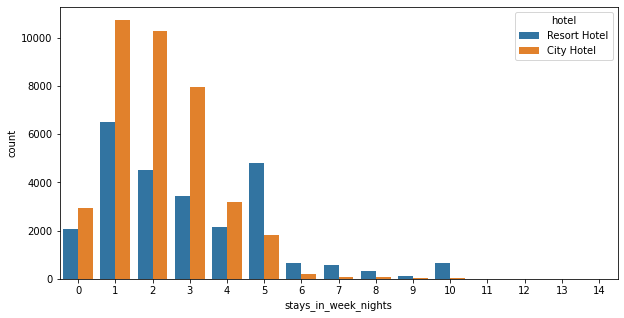

In [63]:
not_canceled = df1[df1['is_canceled'] == 0]
s2 = not_canceled[not_canceled['stays_in_week_nights'] < 15]

plt.figure(figsize = (10,5))
sns.countplot(x = s2['stays_in_week_nights'], hue = s2['hotel'])
plt.show()

We can see, Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, **Resort Hotel** is preferred. 

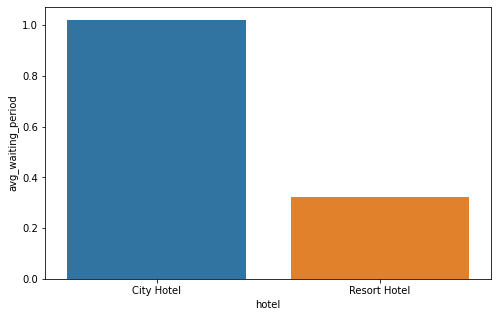

In [64]:
# Checking which type of hotel has longer waiting tme

df7 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {
    'days_in_waiting_list':'avg_waiting_period'}))

plt.figure(figsize = (8,5))
sns.barplot(x = df7['hotel'], y = df7['avg_waiting_period'] )
plt.show()

We can see **City hotel** has significantly longer **waiting time**, hence City Hotel is much busier than Resort Hotel.

**5. Hotel Cancellation**

Now we will check the **cancel** column with **hotel** column and will take out the **cancellation percentage**.

In [67]:
df8 = round(df1['is_canceled'].value_counts()/df1['hotel'].shape[0]*100)
df8

0    73.0
1    27.0
Name: is_canceled, dtype: float64

Clearly index 0 is indicating **City Hotels**, hence we found that **City hotels** have more **cancelled** bookings. Now, we will plot the same with **bar chart.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



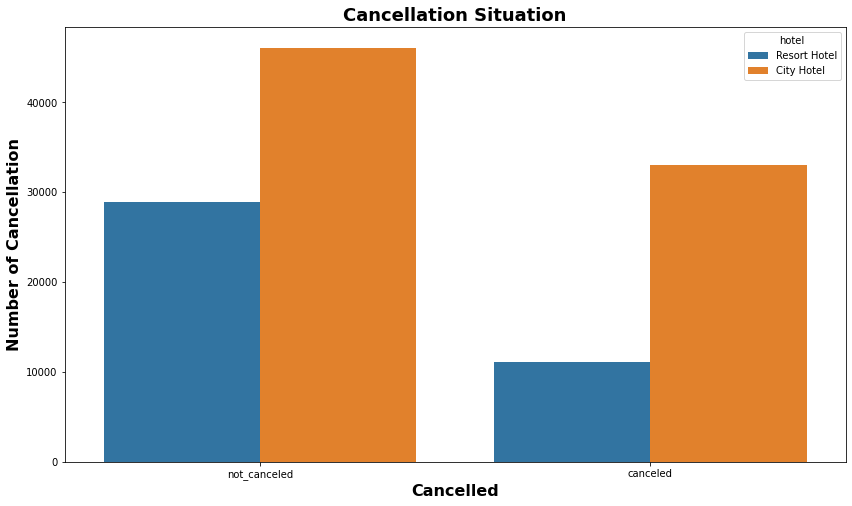

In [89]:
plt.figure(figsize=(14,8))
df1['is_canceled'] = df1.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df1['is_canceled']

sns.countplot(canceled_data, hue = 'hotel', data= df1)
plt.title('Cancellation Situation', fontsize = 18, fontweight = 'bold')
plt.xlabel('Cancelled', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Cancellation', fontsize = 16, fontweight = 'bold')

plt.show()

In [71]:
# Selecting and counting number of cancelled bookings for each hotel.

cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16048,53427,30.04
Resort Hotel,7976,33968,23.48


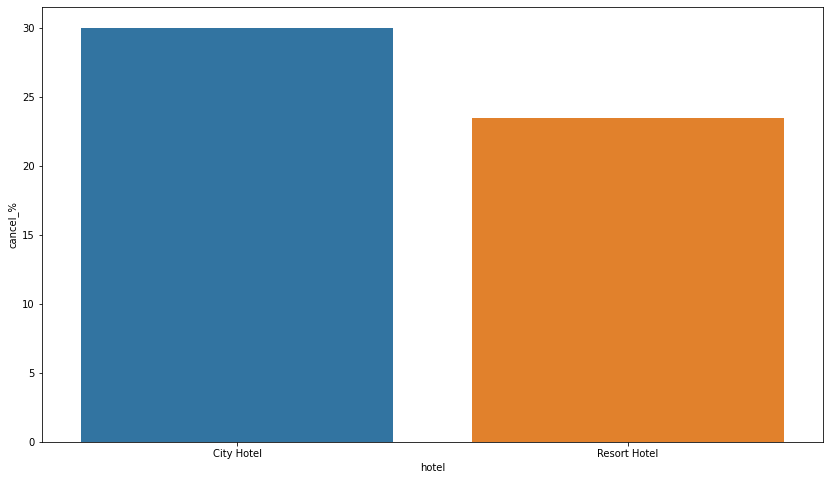

In [72]:
plt.figure(figsize = (14,8))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

**Clearly Resort Hotels have less cancellations**

**6. Hotel Revisit Scenarios**

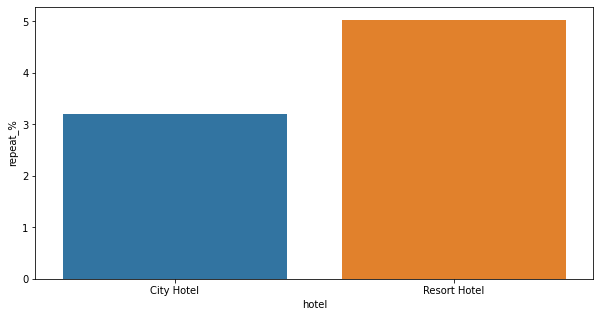

In [73]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will **revisit**, but Resort hotel has slightly **higher revisit %age** than City Hotel.

**7. Distribution Channel Wise**

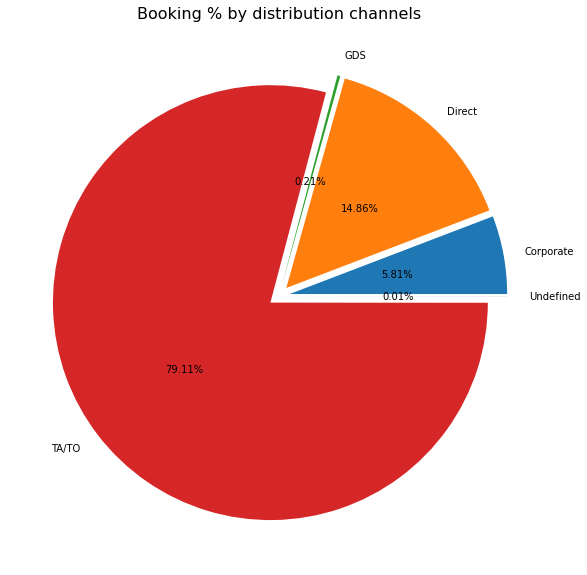

In [74]:
# Finding most common channels for hotel bookings

group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})

plt.figure(figsize = (10,10))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=16);

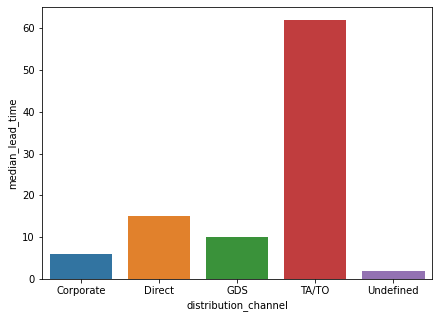

In [75]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

We can see that** TA/TO** is mostly used for planning Hotel visits **ahead of time**. But for sudden visits other mediums are most preferred.

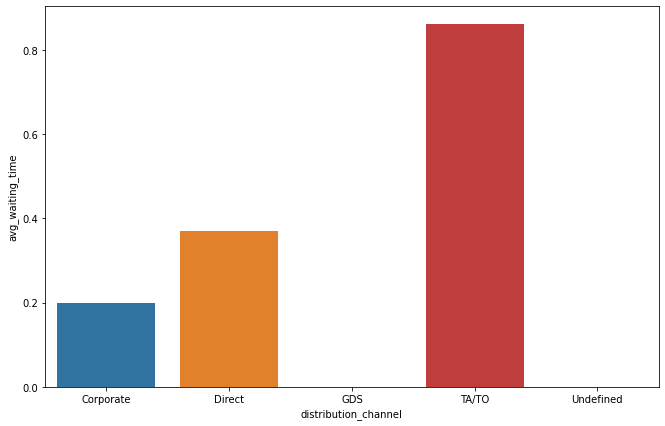

In [76]:
# Finding channel with longer average waiting time

d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (11,7))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

Here, While booking via **TA/TO** one may have to wait a little longer to **confirm booking of rooms**.

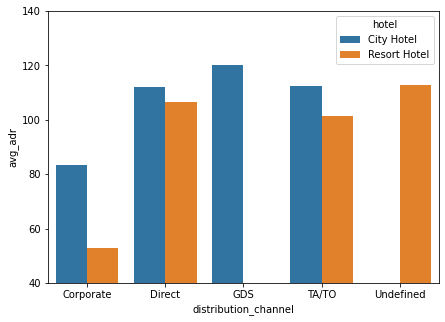

In [77]:
# Finding distribution channel bringing better revenue generating deals for hotels

group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

From this plot we can say that **GDS channel** brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. \
\
Resort hotel has more revnue generating deals by **direct and TA/TO** channel. 

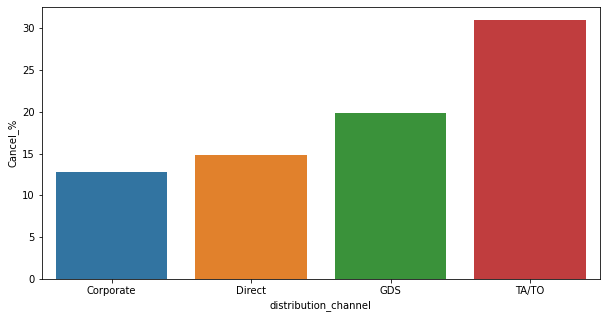

In [78]:
# Finding distribution channel having highest cancellation percentage

d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

**TA/TO has highest booking cancellation %age**

**8. Time Wise Analysis**

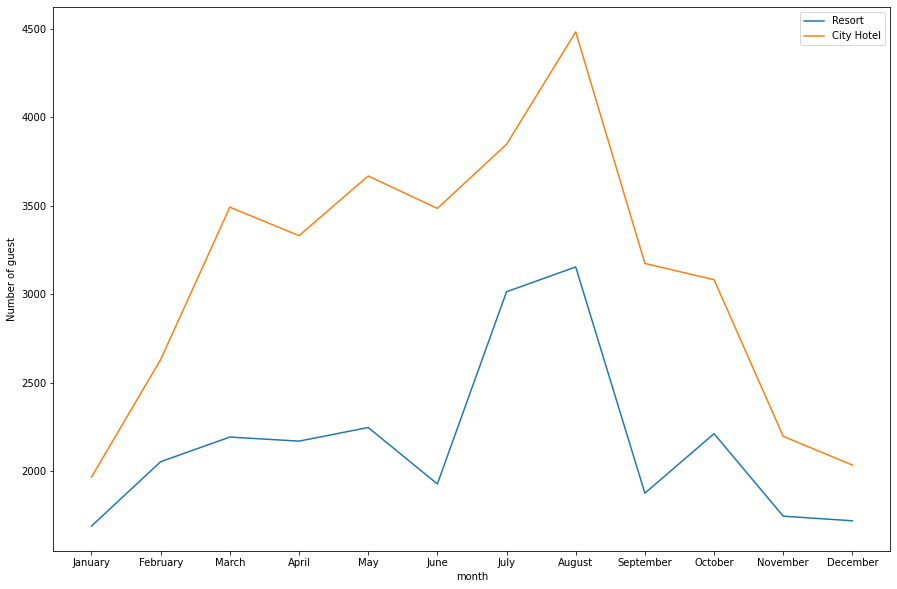

In [79]:
#Which are the most busy months?
d_month = df1['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

**Most number of guest comes in month of August.**

In [80]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

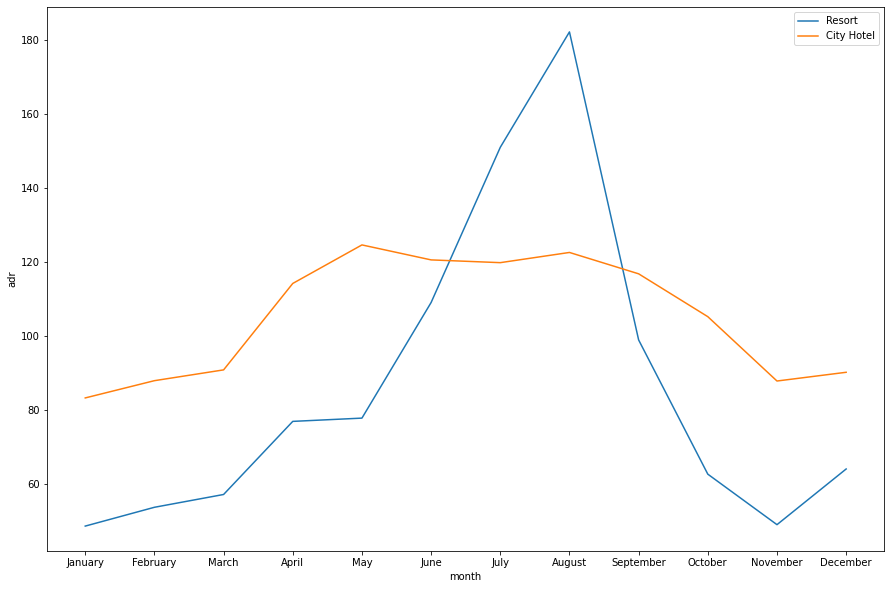

In [81]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

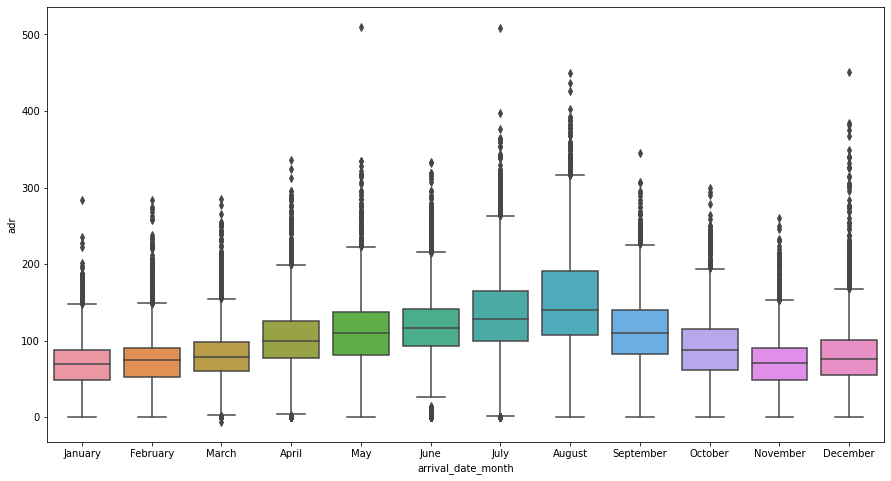

In [82]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

**Avg adr** rises from beginning of year upto middle of year and reaches peak at **August** and then lowers to the end of year. 

**predicting** whether or not a hotel was likely to receive a disproportionately high number of **special requests**

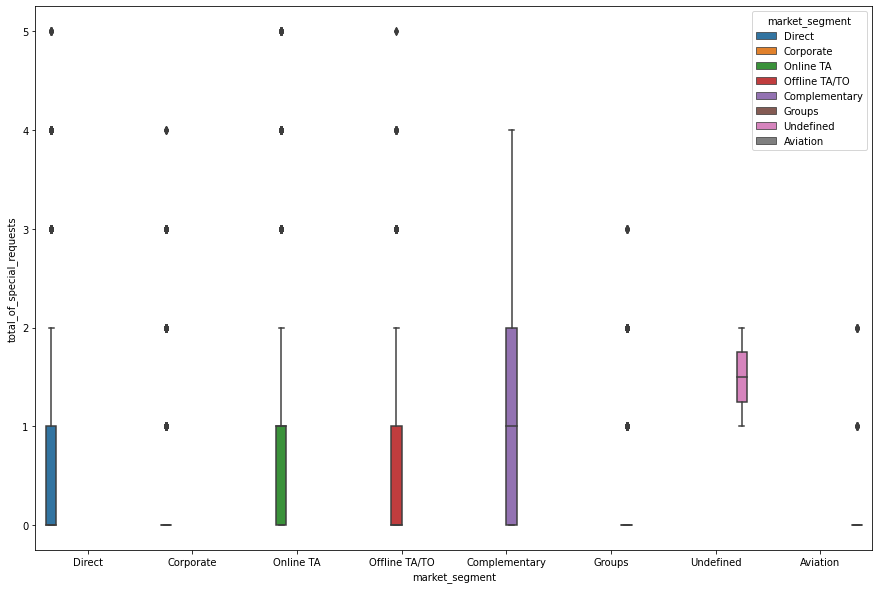

In [83]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df1)

fig = plt.gcf()
fig.set_size_inches(15,10)

**All of market segment mostly have special request.**

**9. Country Wise Analysis**

In [84]:
df1['country'].value_counts().head(15)

PRT    27452
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
USA     1875
CHE     1570
CN      1093
AUT      947
SWE      837
Name: country, dtype: int64

In [86]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests.head(15)

,country,No of guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
5,IRL,2348
6,ITA,1991
7,BEL,1670
8,NLD,1561
9,USA,1416


Now, we will find the **top 15 countries** from where most people booked the **hotels**.

In [88]:
top15 = df1[df1['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD","USA","CHE","CN","AUT","SWE"])]

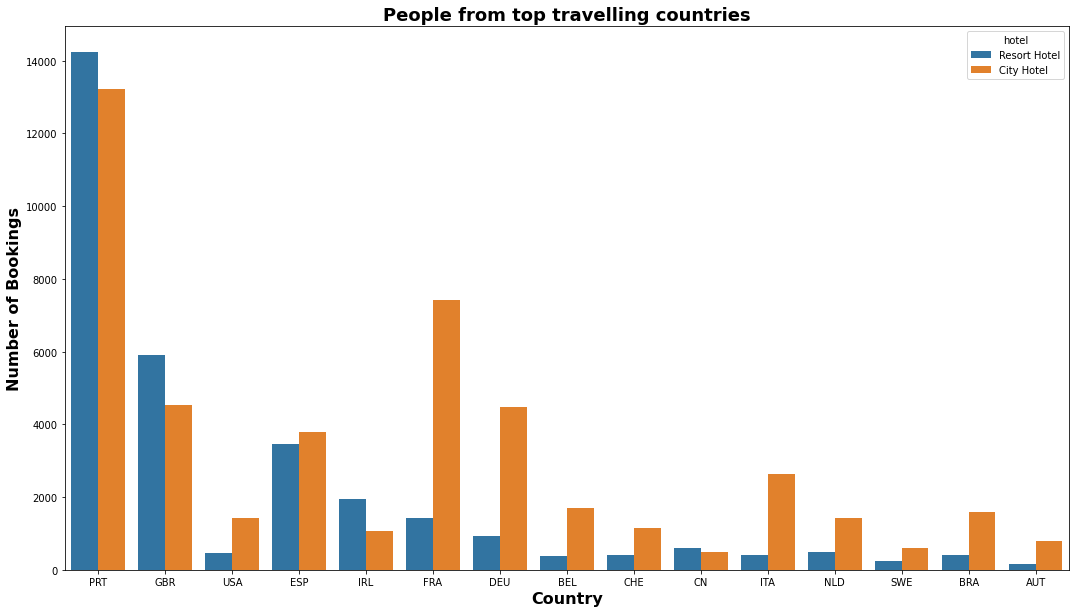

In [89]:
plt.figure(figsize=(18,10))
sns.countplot(x='country', hue = 'hotel', data = top15)
plt.title('People from top travelling countries', fontsize = 18, fontweight = 'bold')
plt.xlabel('Country', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Bookings', fontsize = 16, fontweight = 'bold')
plt.show()

Clearly, The people from top 15 countries chooses **city hotel** over resort hotels. Now we can also make the **map of country location** with counts of the countries.

In [106]:
# showing on the map

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

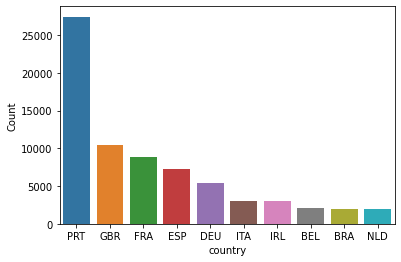

In [92]:
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

**10. Duration of Stay**

In [93]:
# Finding how long do people stay at the hotels

filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [94]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [96]:
stay_time = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay_time = stay_time.iloc[:, :3]
stay_time = stay_time.rename(columns={'is_canceled':'Number of stays'})
stay_time

,total_nights,hotel,Number of stays
0,0,City Hotel,271
1,0,Resort Hotel,351
2,1,City Hotel,7986
3,1,Resort Hotel,6037
4,2,City Hotel,7639
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


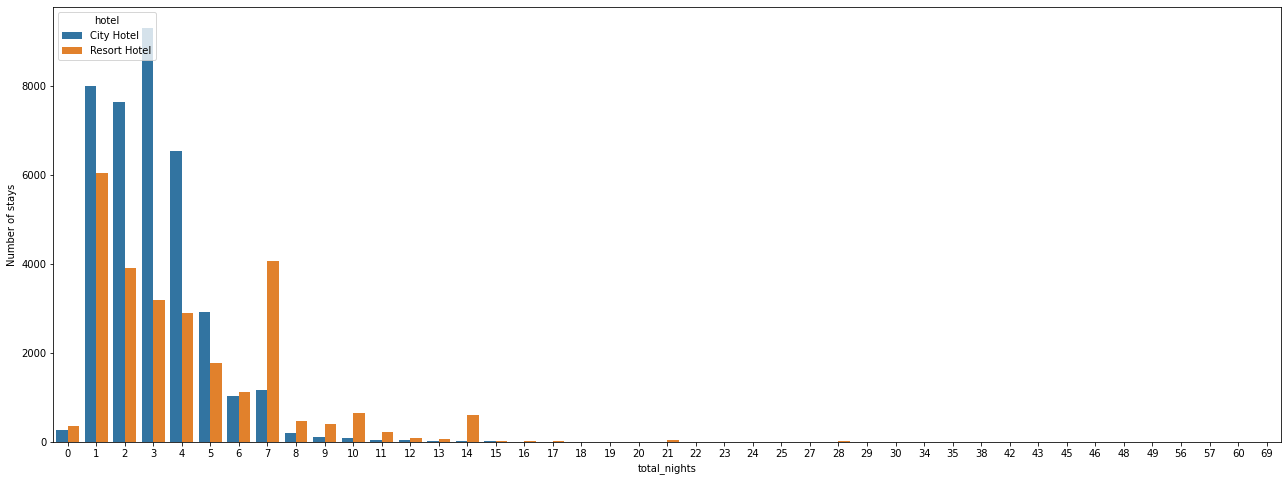

In [99]:
plt.figure(figsize = (22,8))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay_time,hue='hotel')

**Most people prefer to stay at the hotels for less than or equal to 5 days.**

Now we can have a look on the remaining useful **columns** which are **numeric** in nature, we will see them individually in a **histogram plot**.

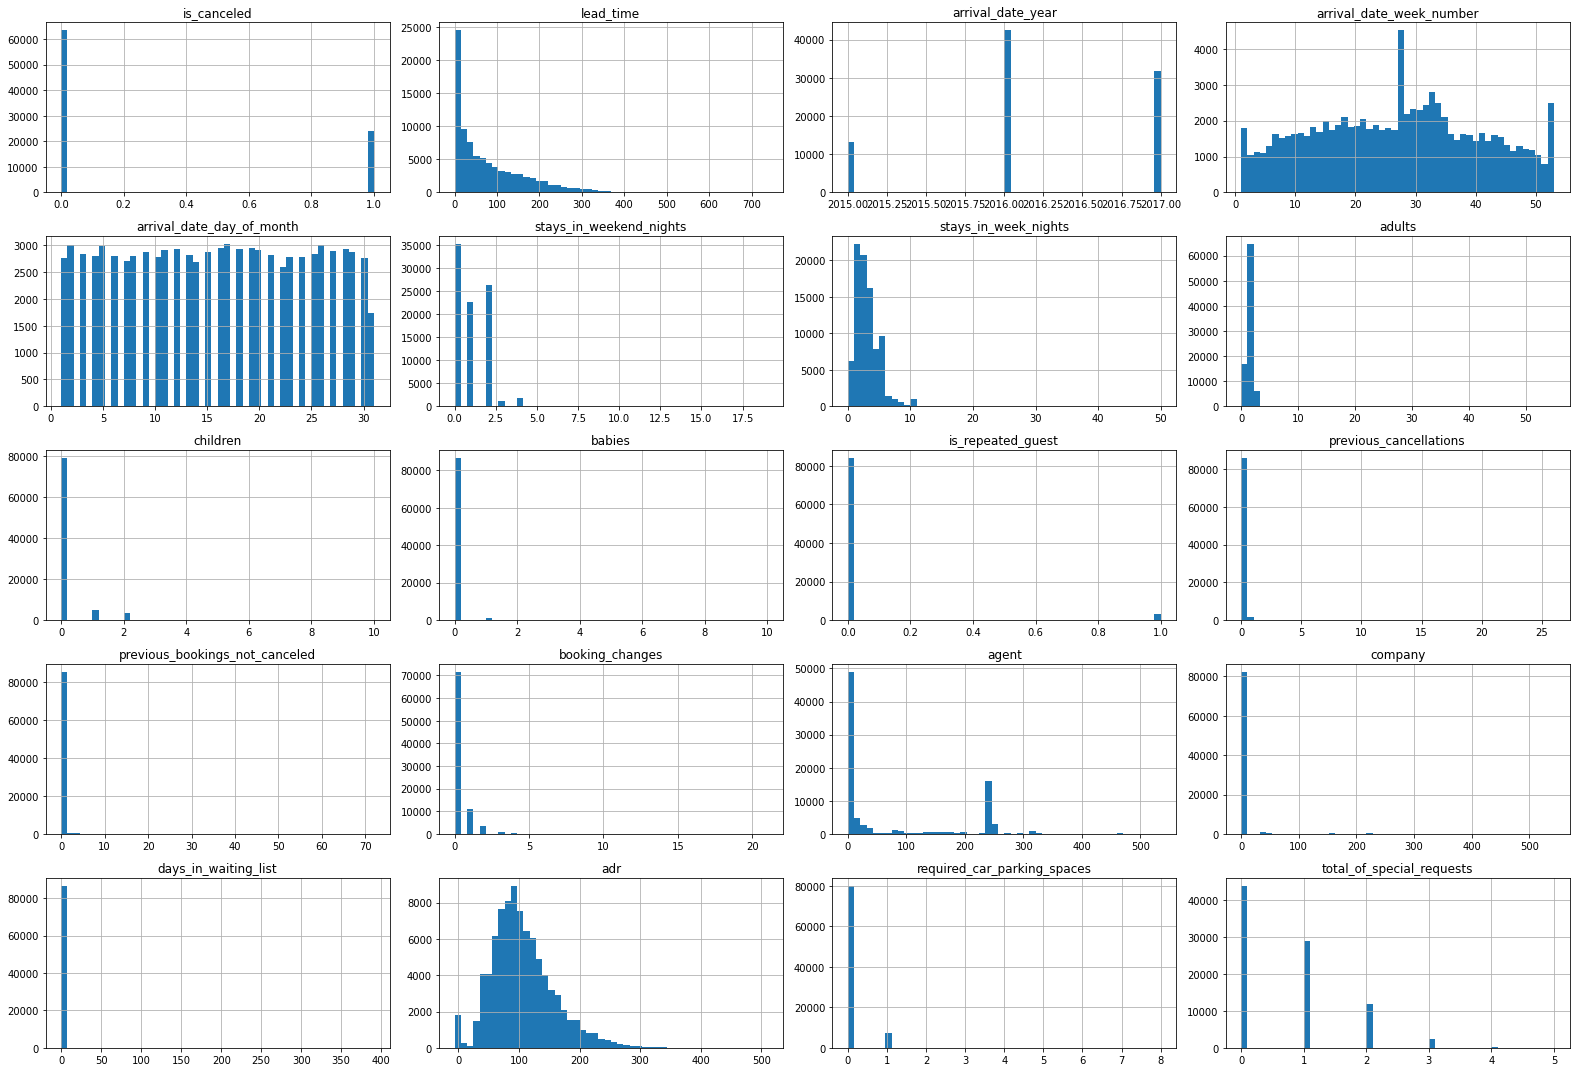

In [70]:
# Histogram plot for each numerical attribute

df1.hist(bins=50, figsize=(22,15))
plt.tight_layout()
plt.show()

Clearly, The people from **top 15** countries chooses **city hotel** over **resort hotels**. Now we can also make the **map of country location** with counts of the countries.

Now, we will calculate the **average price** of the hotel.

In [100]:
# selecting all the rows without zero values

df1 = df1.loc[(df1.children != 0)|(df1.babies != 0)|(df1.adults != 0), :]

# Average hotel prices per person

df1['adr_per_person'] = df1['adr']/(df1['adults'] + df1['children'])

resort_mean = df1.loc[(df1.is_canceled == 0) & (df1.hotel == 'Resort Hotel'), 'adr_per_person'].mean()
city_mean = df1.loc[(df1.is_canceled == 0) & (df1.hotel == 'City Hotel'), 'adr_per_person'].mean()

print("The mean price of Resort hotel is {:.2f}".format(resort_mean))
print ("The mean price of city hotel is {:.2f}".format(city_mean))

The mean price of Resort hotel is 48.11
The mean price of city hotel is 59.51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The **mean price** of a **Resort hotel** is 47.49. The **mean price** of a **city hotel** is 59.27.

**Conclusion:** 

```
```


In this **project**, we covered booking information for a city hotel and a resort hotel including information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other thingsand went through the basic idea of the **EDA** and **visualization process**.